# Collection of Dataset : 

source  : www.kaggle.com

In [1]:
# importing the Required Libraries 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

In [2]:
# importing the dataset file   
data = pd.read_csv('panic_disorder_dataset_training.csv')

In [3]:
#printing the data
data

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,NaN,NaN,Socializing,Low,Diet,0
99996,99997,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,NaN,Meditation,High,Diet,0
99997,99998,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Seeking therapy,Low,Exercise,0
99998,99999,56,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1


In [4]:
#showing the dimensions of the data(shape)
data.shape
#rows = 100000
#columns = 17

(100000, 17)

In [5]:
data.describe()

,Participant ID,Age,Panic Disorder Diagnosis
count,100000.000000,100000.000000,100000.00000
mean,50000.500000,41.454300,0.04285
std,28867.657797,13.839204,0.20252
min,1.000000,18.000000,0.00000
25%,25000.750000,29.000000,0.00000
50%,50000.500000,41.000000,0.00000
75%,75000.250000,53.000000,0.00000
max,100000.000000,65.000000,1.00000


In [6]:
#top 5 rows and last 5 rows of the data
data.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0


In [7]:
data.tail()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
99995,99996,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,NaN,NaN,Socializing,Low,Diet,0
99996,99997,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,NaN,Meditation,High,Diet,0
99997,99998,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Seeking therapy,Low,Exercise,0
99998,99999,56,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1
99999,100000,18,Male,No,No,Low,Panic attacks,Severe,Mild,Rural,Diabetes,NaN,NaN,Meditation,Moderate,Exercise,0


In [8]:
#Checking for missing values 
data.isnull().sum()

Participant ID                  0
Age                             0
Gender                          0
Family History                  0
Personal History                0
Current Stressors               0
Symptoms                        0
Severity                        0
Impact on Life                  0
Demographics                    0
Medical History             25173
Psychiatric History         24921
Substance Use               33374
Coping Mechanisms               0
Social Support                  0
Lifestyle Factors               0
Panic Disorder Diagnosis        0
dtype: int64

In [9]:
# we found some missing values there we are droping those
data.dropna()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
10,11,25,Female,Yes,No,High,Shortness of breath,Severe,Mild,Urban,Asthma,Bipolar disorder,Alcohol,Exercise,High,Diet,0
11,12,45,Male,Yes,No,High,Chest pain,Severe,Mild,Urban,Asthma,Depressive disorder,Alcohol,Seeking therapy,High,Diet,0
13,14,64,Male,No,No,High,Shortness of breath,Moderate,Mild,Urban,Asthma,Bipolar disorder,Alcohol,Exercise,High,Exercise,0
15,16,41,Female,No,No,Low,Fear of losing control,Severe,Mild,Rural,Asthma,Bipolar disorder,Alcohol,Meditation,High,Exercise,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,99986,26,Female,No,No,High,Shortness of breath,Mild,Significant,Urban,Heart disease,Depressive disorder,Drugs,Socializing,Low,Exercise,0
99986,99987,32,Female,No,No,Moderate,Fear of losing control,Moderate,Significant,Rural,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
99990,99991,46,Male,Yes,Yes,Moderate,Fear of losing control,Moderate,Significant,Rural,Asthma,Bipolar disorder,Alcohol,Exercise,Low,Sleep quality,0
99993,99994,30,Female,No,Yes,Low,Fear of losing control,Mild,Moderate,Rural,Heart disease,Anxiety disorder,Alcohol,Socializing,High,Exercise,0


In [10]:
data.isnull().sum()

Participant ID                  0
Age                             0
Gender                          0
Family History                  0
Personal History                0
Current Stressors               0
Symptoms                        0
Severity                        0
Impact on Life                  0
Demographics                    0
Medical History             25173
Psychiatric History         24921
Substance Use               33374
Coping Mechanisms               0
Social Support                  0
Lifestyle Factors               0
Panic Disorder Diagnosis        0
dtype: int64

In [11]:
data['Medical History'].value_counts()

Medical History
Diabetes         25074
Heart disease    24993
Asthma           24760
Name: count, dtype: int64

In [12]:
data['Psychiatric History'].value_counts()

Psychiatric History
Bipolar disorder       25058
Anxiety disorder       25025
Depressive disorder    24996
Name: count, dtype: int64

In [13]:
data.drop(columns=['Medical History','Psychiatric History'],inplace = True)

In [14]:
data

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,NaN,Socializing,Low,Diet,0
99996,99997,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,NaN,Meditation,High,Diet,0
99997,99998,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,NaN,Seeking therapy,Low,Exercise,0
99998,99999,56,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Drugs,Socializing,High,Sleep quality,1


Now, there are no missing values in the dataset. Hence dataset is filtred 

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [16]:
#finding the categorical data and converting them into numeriv by label encoding technique
columns_to_encode = ['Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 
                     'Severity', 'Impact on Life', 'Demographics', 'Substance Use','Coping Mechanisms','Social Support','Lifestyle Factors']



# Encode each column
for col in columns_to_encode:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col].astype(str))

# Display the transformed DataFrame
data.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,1,0,1,2,4,0,0,0,2,3,0,2,0
1,2,51,1,0,0,0,3,0,0,1,1,0,0,2,0
2,3,32,0,1,0,0,3,0,2,1,2,2,2,1,0
3,4,64,0,0,0,2,0,1,1,0,2,1,0,1,0
4,5,31,1,1,0,2,3,0,1,0,1,2,1,2,0


In [17]:
data.describe()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,50000.500000,41.454300,0.500520,0.500420,0.497900,0.998530,1.997580,1.001450,0.997630,0.499130,0.999290,1.504780,0.999000,0.99741,0.04285
std,28867.657797,13.839204,0.500002,0.500002,0.499998,0.816036,1.411706,0.817774,0.816499,0.500002,0.817433,1.118369,0.817353,0.81488,0.20252
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,25000.750000,29.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000
50%,50000.500000,41.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.00000,0.00000
75%,75000.250000,53.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2.00000,0.00000
max,100000.000000,65.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2.00000,1.00000


In [18]:
data.drop(columns=['Impact on Life', 'Substance Use','Coping Mechanisms','Demographics'],inplace=True)

In [19]:
data

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,1,0,1,2,4,0,0,2,0
1,2,51,1,0,0,0,3,0,0,2,0
2,3,32,0,1,0,0,3,0,2,1,0
3,4,64,0,0,0,2,0,1,0,1,0
4,5,31,1,1,0,2,3,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,22,1,1,0,0,0,0,1,0,0
99996,99997,57,0,0,1,1,3,2,0,0,0
99997,99998,20,1,1,0,2,3,2,1,1,0
99998,99999,56,0,1,1,0,0,2,0,2,1


# Data Visualization

In [20]:
#univariate Analysis

In [21]:
#data analysis through graphs
#bivariate analysis

<Axes: xlabel='Age', ylabel='count'>

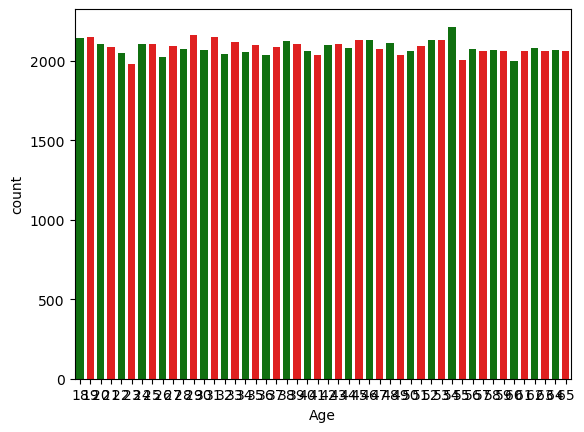

In [22]:
sns.countplot(data=data,x='Age',palette =['green','red'],width = 0.7) 

C:\Users\DELL\AppData\Local\Temp\ipykernel_9184\1624834894.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Panic Disorder Diagnosis'])


<Axes: xlabel='Panic Disorder Diagnosis', ylabel='Density'>

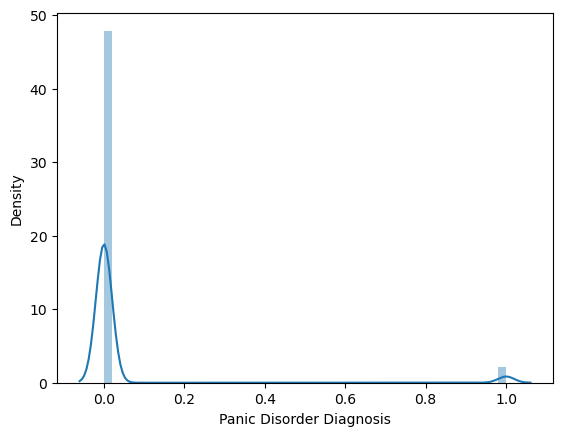

In [23]:
sns.distplot(data['Panic Disorder Diagnosis'])

In [24]:
#show the age and panic disorder in terms of density

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


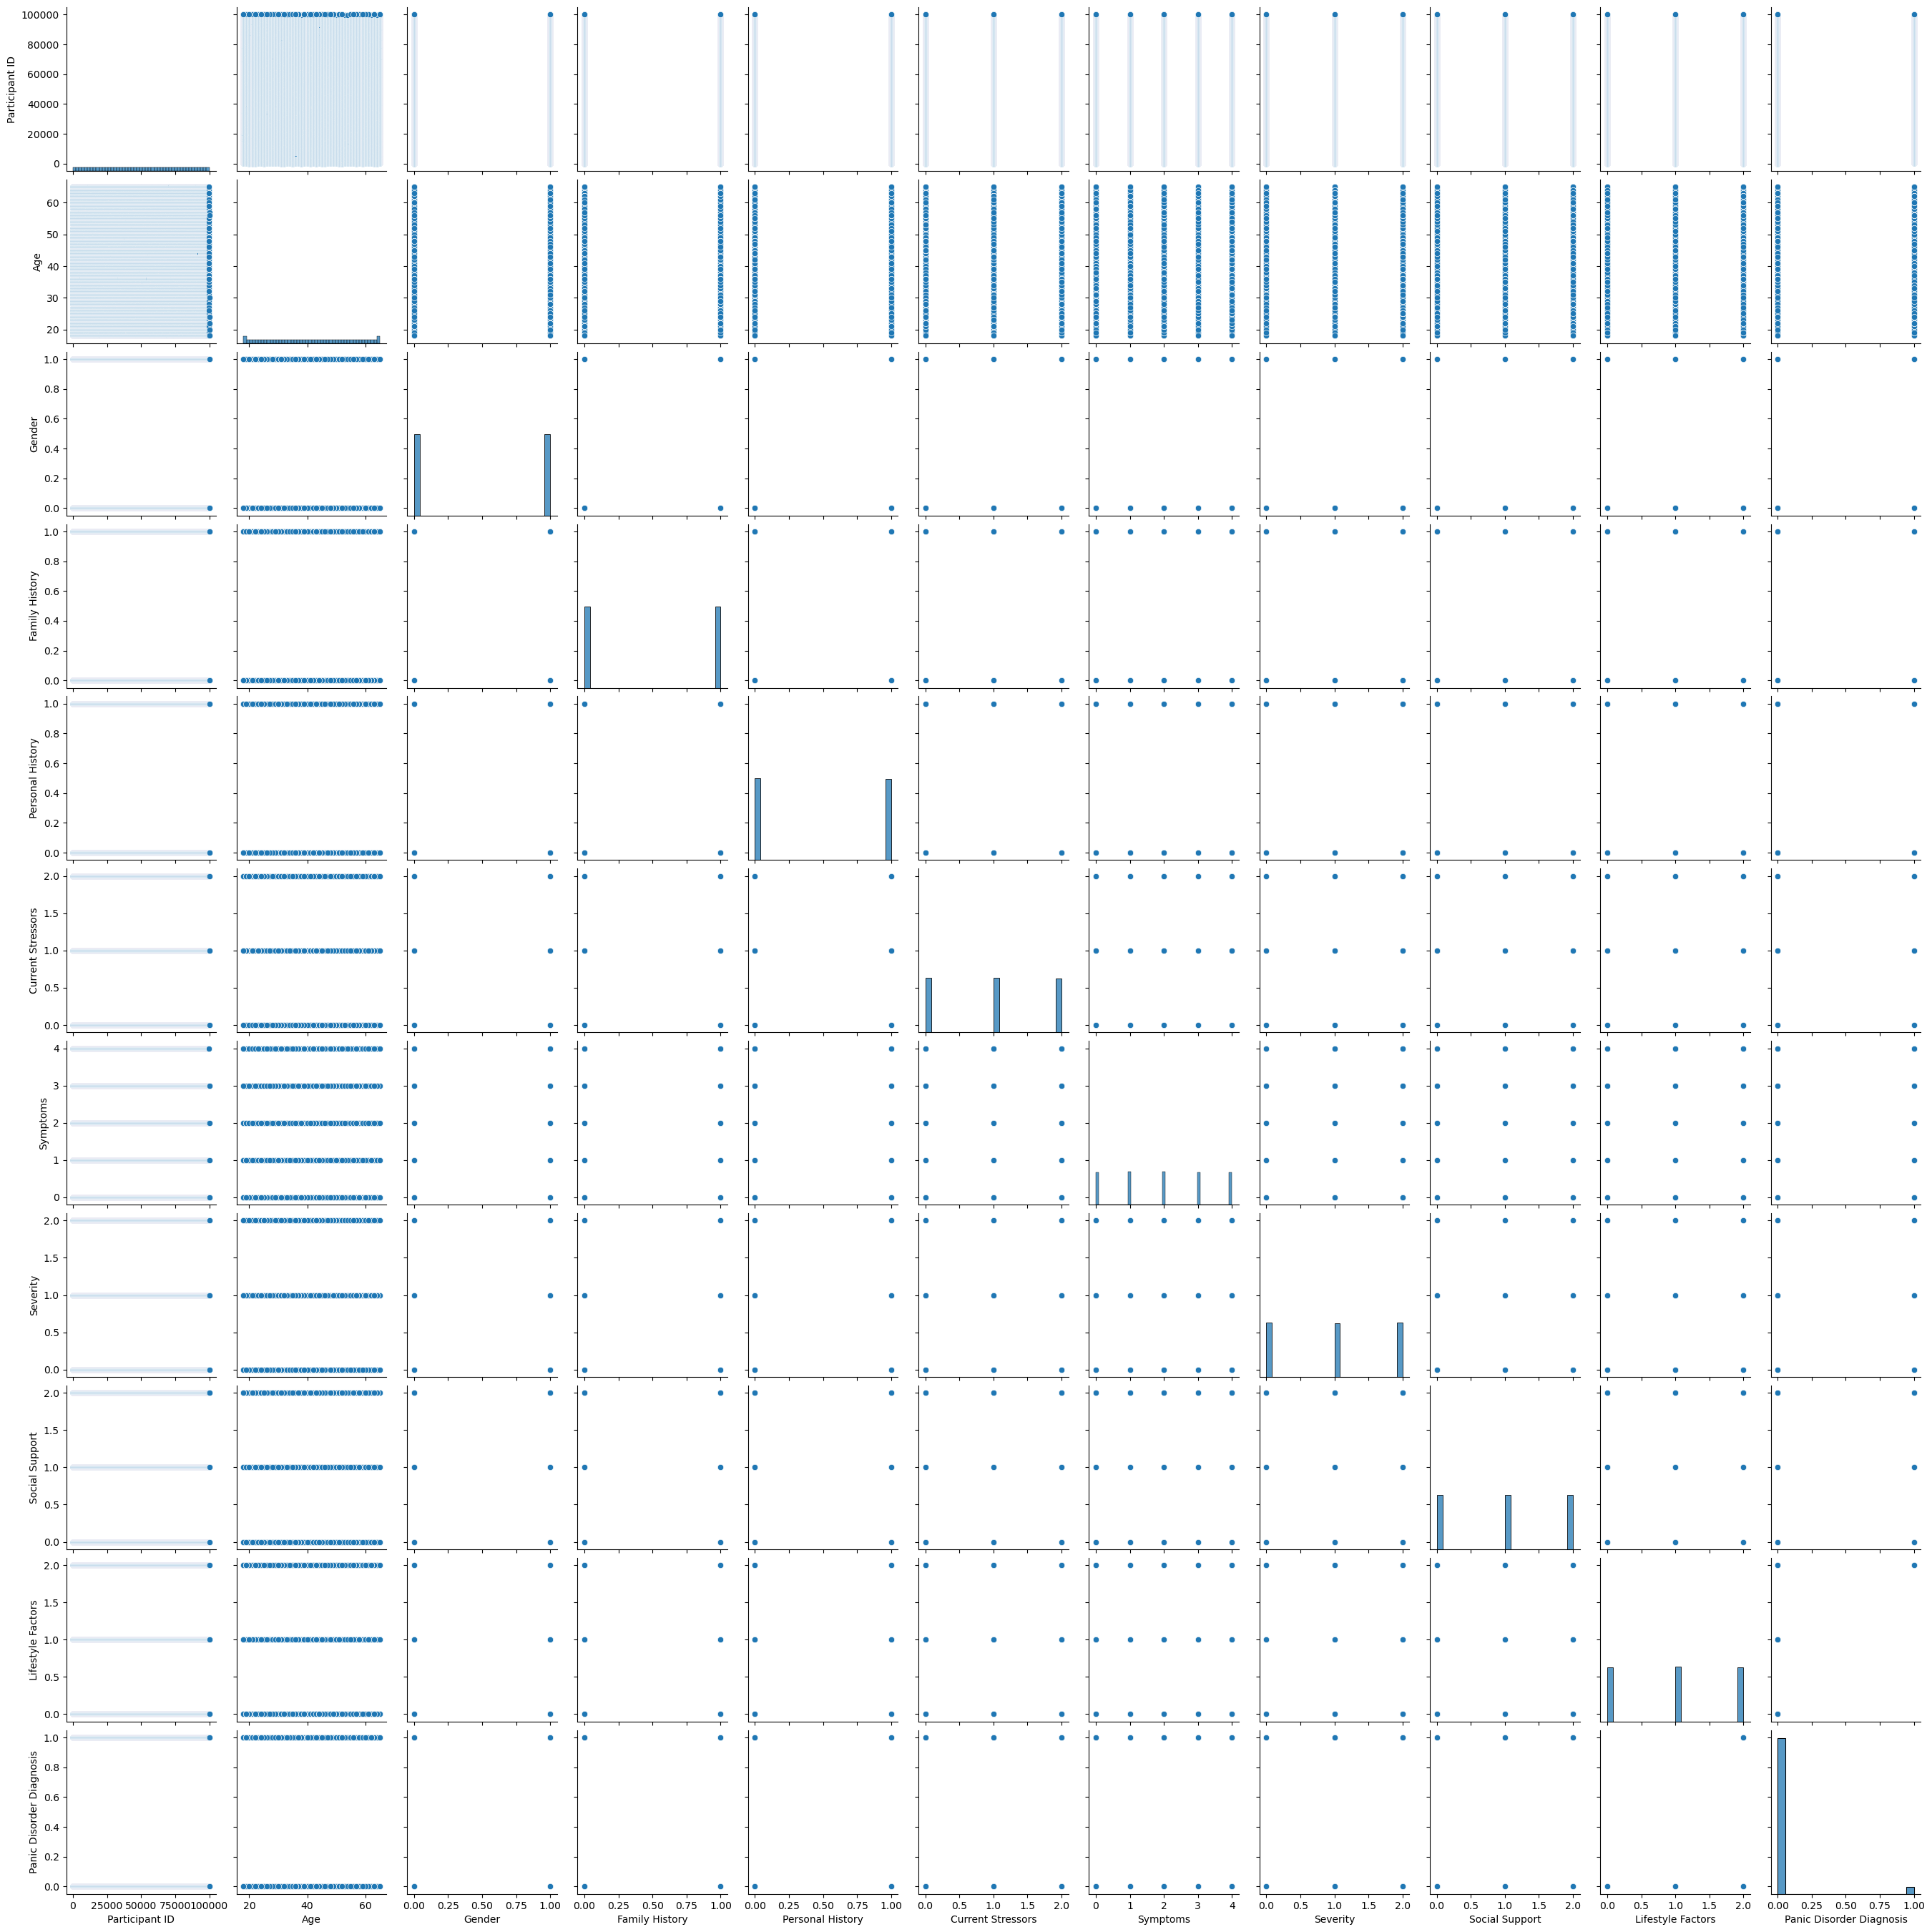

In [25]:
sns.pairplot(data)
#multivariate analysis

In [26]:
hn = data.corr()

In [27]:
hn

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
Participant ID,1.000000,-0.001071,0.001674,0.003957,-0.003890,0.001858,-0.007720,-0.001184,-0.000292,-0.003263,0.000182
Age,-0.001071,1.000000,0.002252,0.001386,0.002692,0.003633,0.004284,-0.000413,0.004726,0.000854,-0.000502
Gender,0.001674,0.002252,1.000000,0.006519,0.000724,0.000553,-0.000154,0.001331,-0.001858,0.001685,0.002199
Family History,0.003957,0.001386,0.006519,1.000000,0.002604,0.000896,0.002084,-0.003731,0.003598,-0.006489,0.066927
Personal History,-0.003890,0.002692,0.000724,0.002604,1.000000,0.002946,0.003124,-0.003111,0.003788,0.002551,0.075500
Current Stressors,0.001858,0.003633,0.000553,0.000896,0.002946,1.000000,-0.004031,0.002940,-0.003106,-0.003705,-0.150833
Symptoms,-0.007720,0.004284,-0.000154,0.002084,0.003124,-0.004031,1.000000,-0.004345,0.003213,0.003098,0.043315
Severity,-0.001184,-0.000413,0.001331,-0.003731,-0.003111,0.002940,-0.004345,1.000000,0.002381,-0.008878,0.097926
Social Support,-0.000292,0.004726,-0.001858,0.003598,0.003788,-0.003106,0.003213,0.002381,1.000000,-0.004328,0.003461
Lifestyle Factors,-0.003263,0.000854,0.001685,-0.006489,0.002551,-0.003705,0.003098,-0.008878,-0.004328,1.000000,0.260326


<Axes: >

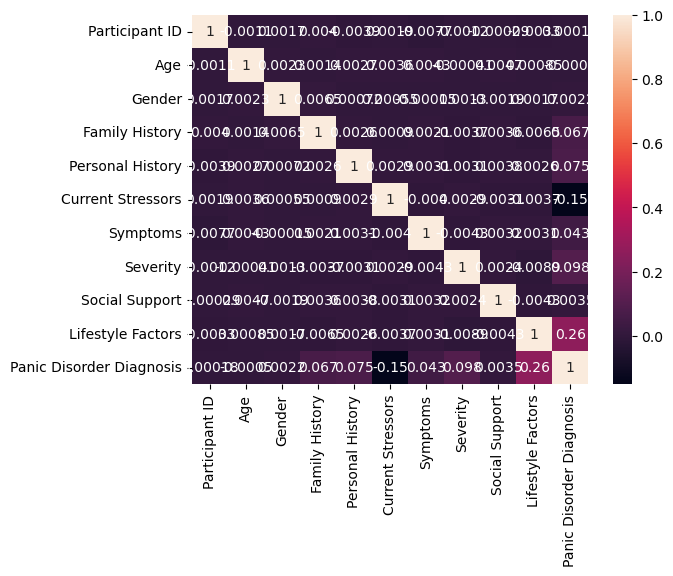

In [28]:
sns.heatmap(hn,annot = True)


In [29]:
x=data.drop('Panic Disorder Diagnosis',axis=1)
y=data['Panic Disorder Diagnosis']

In [30]:
x

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Social Support,Lifestyle Factors
0,1,38,1,0,1,2,4,0,0,2
1,2,51,1,0,0,0,3,0,0,2
2,3,32,0,1,0,0,3,0,2,1
3,4,64,0,0,0,2,0,1,0,1
4,5,31,1,1,0,2,3,0,1,2
...,...,...,...,...,...,...,...,...,...,...
99995,99996,22,1,1,0,0,0,0,1,0
99996,99997,57,0,0,1,1,3,2,0,0
99997,99998,20,1,1,0,2,3,2,1,1
99998,99999,56,0,1,1,0,0,2,0,2


In [31]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Panic Disorder Diagnosis, Length: 100000, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()

In [34]:
x=sc.fit_transform(x)

In [35]:
x

array([[-1.73203349e+00, -2.49603754e-01,  9.98960540e-01, ...,
        -1.22461072e+00, -1.22224446e+00,  1.23035861e+00],
       [-1.73199885e+00,  6.89761329e-01,  9.98960540e-01, ...,
        -1.22461072e+00, -1.22224446e+00,  1.23035861e+00],
       [-1.73196421e+00, -6.83156870e-01, -1.00104054e+00, ...,
        -1.22461072e+00,  1.22469140e+00,  3.17839675e-03],
       ...,
       [ 1.73196421e+00, -1.55026310e+00,  9.98960540e-01, ...,
         1.22106449e+00,  1.22346793e-03,  3.17839675e-03],
       [ 1.73199885e+00,  1.05105559e+00, -1.00104054e+00, ...,
         1.22106449e+00, -1.22224446e+00,  1.23035861e+00],
       [ 1.73203349e+00, -1.69478081e+00,  9.98960540e-01, ...,
         1.22106449e+00,  1.22469140e+00,  3.17839675e-03]])

In [36]:
arr_1d = np.array(y)

In [37]:
y_new = arr_1d[:, np.newaxis]

In [38]:
y_new  = arr_1d.reshape(-1, 1)

In [39]:
y_new 

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [40]:
#y_new=sc.fit_transform(y_new)

In [41]:
#y_new

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_new,test_size=0.2,random_state=0)

In [43]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [44]:
import xgboost as xgb

In [45]:
xg=xgb.XGBClassifier()

In [46]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
pred=xg.predict(x_test)

In [48]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
str(accuracy_score(y_test,pred)* 100)+ ' %' + ' percentage'

'96.71 % percentage'

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     19181
           1       0.63      0.47      0.54       819

    accuracy                           0.97     20000
   macro avg       0.80      0.73      0.76     20000
weighted avg       0.96      0.97      0.96     20000



In [53]:
confusion_matrix(y_test,pred)

array([[18957,   224],
       [  434,   385]], dtype=int64)

In [54]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [55]:
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [56]:
ab.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [57]:
gb.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [58]:
pred2= ab.predict(x_test)

In [59]:
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
pred3= gb.predict(x_test)

In [61]:
pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
print("accuracy of Adaboost model:", accuracy_score(y_test, pred2))

accuracy of Adaboost model: 0.956


In [63]:
print("accuracy of Gradientboost model:", accuracy_score(y_test,pred3))

accuracy of Gradientboost model: 0.9696


In [64]:
#import pickle
#pickle.dump(sc,open("churnscaler.pkl",'wb'))


In [65]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [66]:
model=Sequential()

In [67]:
model.add(Dense(units=10,activation='relu',kernel_initializer='random_uniform'))

In [68]:
model.add(Dense(units=26,activation='relu',kernel_initializer='random_uniform'))

In [69]:
model.add(Dense(units=26,activation='relu',kernel_initializer='random_uniform'))

In [70]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='random_uniform'))

In [71]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
model.fit(x_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9544 - loss: 0.1876
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9600 - loss: 0.0889
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9630 - loss: 0.0818
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9624 - loss: 0.0778
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9631 - loss: 0.0761
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9626 - loss: 0.0759
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.9637 - loss: 0.0761
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.9637 - loss: 0.0750
Epoch 9/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.9650 - loss: 0.0738
Epoch 10/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.9654 - loss: 0.0734
Epoch 11/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - accuracy: 0.9648 - loss: 0.0738
Epoch 12/20
2500/2

In [73]:
ypred=model.predict(x_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


In [74]:
ypred

array([[0.0000000e+00],
       [1.7050850e-01],
       [0.0000000e+00],
       ...,
       [7.5366036e-15],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [75]:
ypred=ypred>0.5
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [76]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [77]:
import pickle
pickle.dump(sc,open("panic.pkl",'wb'))